<a href="https://colab.research.google.com/github/AnilAren/DataScience-Playground/blob/main/Diabetes_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and reading the csv**

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import seaborn as sns

In [2]:
# Data from kaggle
# link - https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

df =pd.read_csv("/content/diabetes.csv")

# **Preprocessing**

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0 ---> Non Diabetic

1 ---> Diabetic

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
df.shape

(768, 9)

In [13]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [19]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [20]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [21]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

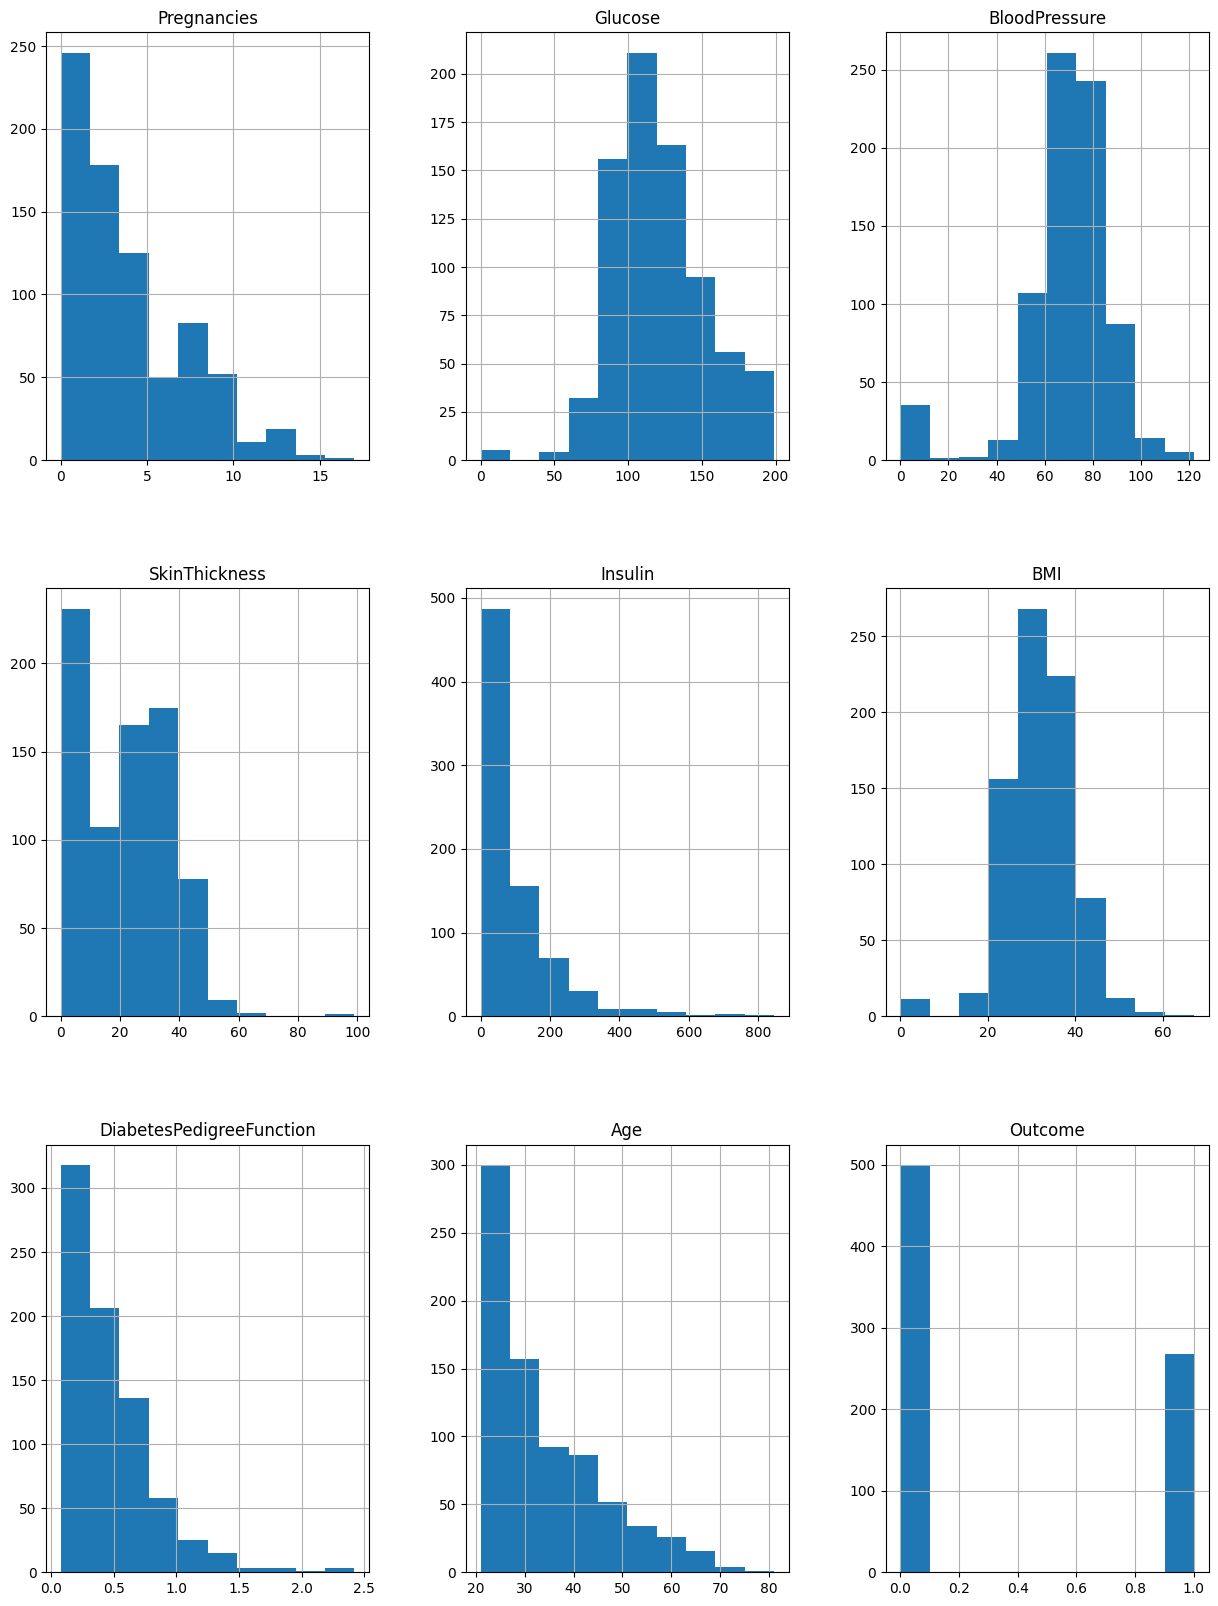

In [25]:
df.hist(figsize=(15,20),bins = 10,xlabelsize=10,ylabelsize =10)

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

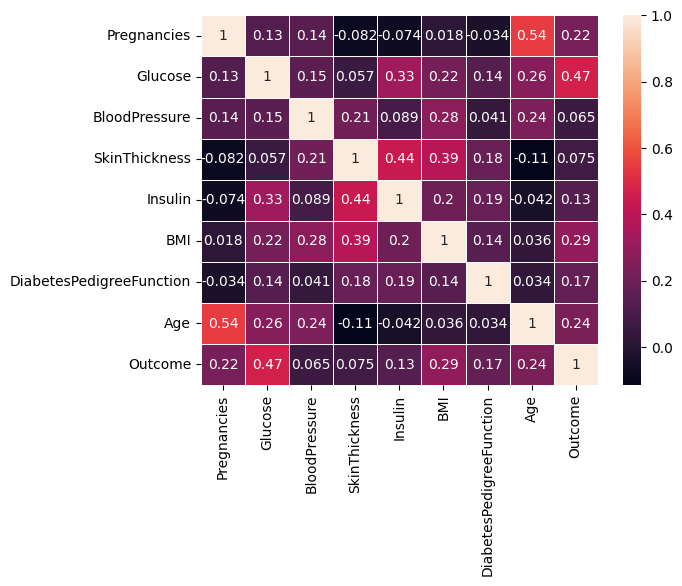

In [33]:
sns.heatmap(df.corr(),annot=True,linewidths=.5)

# **Spliting Data to Train and Test**

In [36]:
x = df.drop("Outcome",axis=1)
y = df['Outcome']

Data Standardisation - for proper caluculations




In [43]:
sc=StandardScaler()
sc_xtr = sc.fit_transform(x)

In [44]:
x = sc_xtr
y = y

In [45]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [46]:
print(x_tr.shape)
print(x_te.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(614, 8)
(154, 8)
(154, 8)
(614,)
(154,)


In [47]:
print(y_tr.value_counts())
print(y_te.value_counts())

Outcome
0    400
1    214
Name: count, dtype: int64
Outcome
0    100
1     54
Name: count, dtype: int64


# **Model Creation**

In [55]:
classifier=svm.SVC(kernel='linear')

In [56]:
classifier.fit(x_tr,y_tr)

SVC(kernel='linear')

In [57]:
y_pred_tr=classifier.predict(x_tr)
accuracy_score(y_pred_tr,y_tr)

0.7866449511400652

In [58]:
y_pred_te=classifier.predict(x_te)
accuracy_score(y_pred_te,y_te)

0.7727272727272727

# **Prediction Model** - create a prediction system

In [74]:
input_data = (0,137,40,35,168,43.1,2.288,33)

In [75]:
convert_to_np_array  = np.asarray(input_data)

In [76]:
convert_to_2d = convert_to_np_array.reshape(1,-1)
sc_convert_to_2d = sc.transform(convert_to_2d)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
prediction = classifier.predict(sc_convert_to_2d)
prediction

array([1])

In [78]:
if prediction[0]==0:
  print("NON Diabetic")
else:
  print("Diabetic")

Diabetic
